## Reading 21-2 - Combining Concepts - stdout and FILE*

### What exactly is in a FILE, anyway?

A set of ASCII values in the Data Memory that ends with a -1

In the image below, we have three different representations of information:
<ul>
    <li>On the left, how we might think of a file, with an integer, a double, and a string</li>
    <li>In the middle, we translate everything to ASCII, include newline characters (10) and spaces (32)</li>
    <li>On the right, we see the values represented sequentially, with a pointer at the current location we are reading</li>
</ul>

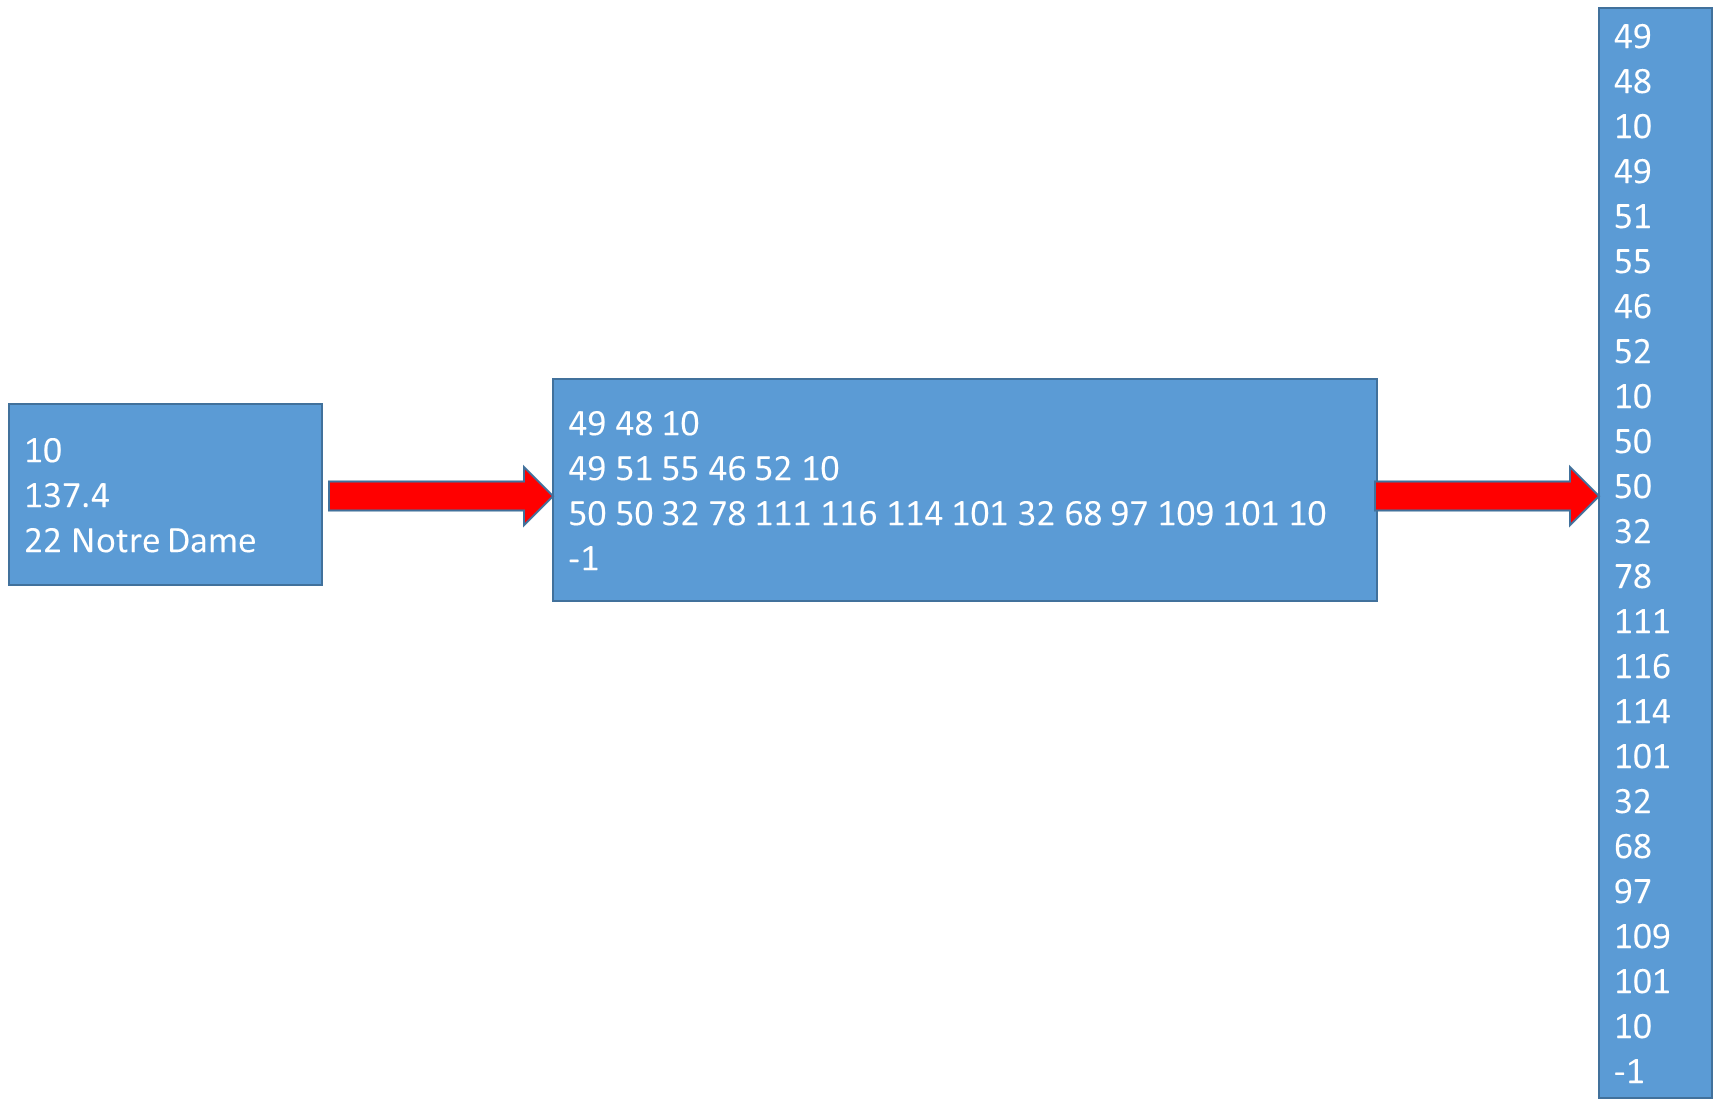

### Input fscanf and fprintf

We can now combine all concepts by seeing what <code>fscanf</code> actually is:

<code>int fscanf(FILE *ptr, const char *format, ...)</code>
<ul>
    <li>Gets every ASCII character between the current pointer and the next space</li>
    <li>We use the specifiers to indicate what the type <i>should</i> be</li>
</ul>

<code>int fprintf(FILE *stream, const char *format, ...);</code>
<ul>
    <li>Prints the ASCII representation to the output location for <code>FILE* stream</code></li>
    <li>We use the specifiers to indicate what the type <i>should</i> be</li>
</ul>

### What does this mean for <code>stdout</code> and <code>stdin</code>

This means they are <code>FILE*</code> pointers! This is why we were able to get information on the location of <code>stdin</code> and <code>stdout</code> when we printed the locations using <code>%p</code>.

### Example

In the example file_locations.c</code>, we print locations and values of inputs to stdin, stdout, argc and argv, and the FILE*

    #include <stdio.h>
    #include <stdlib.h>

    int main( const int argc, const char* argv[] ){

      FILE* print_out =  fopen("example_output.txt", "w");

      if( print_out == NULL ){
          exit(-1);
      }

      fprintf( print_out, "stdout on the stack at %p\n", stdout );
      fprintf( print_out, "stdin  on the stack at %p\n", stdin );
      fprintf( print_out, "print_out  on the heap at %p\n", print_out );

      fprintf( print_out, "Address and value of argc: %p %d\n", &argc, argc );
      fprintf( print_out, "Register and Base Address of argv: %p %p\n", &argv, argv );

      int iter;
      for( iter = 0; iter < argc; ++iter ){
          fprintf( stdout, "Printing to stdout: %s %p\n", argv[iter], &argv[iter] );
          fprintf( print_out, "Printing to print_out: %s %p\n", argv[iter], &argv[iter] );
      }

      fclose(print_out);

      return EXIT_SUCCESS;
    }

### Looping through a FILE*

Since we know that <code>FILE*</code> is a struct, this means that the struct must have members.

Let us consider the following <code>FILE*</code>

    FILE* the_input = fopen( "input.txt", "r" );
    
There are two crucial members: <code>_IO_read_ptr</code> and <code>_IO_read_end</code>

<code>the_input->_IO_read_ptr</code>
    Pointer to the current location of the FILE

<code>the_input->_IO_read_end</code>
    Pointer to where the file ends

When they end, we can break!

    if( the_input->_IO_read_ptr == the_input->_IO_read_end )
        break;

> <b>Optional Reading 1:</b> Here is the full documentation on C structs and FILE https://code.woboq.org/userspace/glibc/libio/bits/types/struct_FILE.h.html#_IO_FILE 


> <b>Optional Reading 2:</b> Here is the full documentation on fscanf as a FILE* https://android.googlesource.com/platform/bionic/+/9831ad3/libc/stdio/vfscanf.c 
![image-3.png]


### FILE* Example

This example will put all the pieces together. Consider the file <a href = "https://github.com/mmorri22/cse20133/blob/main/readings/lec21/FILE_example.c">FILE_example.c</a>:

    #include <stdio.h>
    #include <stdlib.h>

    int main( const int argc, const char** argv ){

        if( argc != 2){
            fprintf( stdout, "Need exactly 2 inputs\n");
            return EXIT_FAILURE;
        }

        FILE* the_input = fopen( argv[1], "r" );

        if( the_input == NULL ){
            fprintf( stdout, "%s is not a valid file\n", argv[1] );
            return EXIT_FAILURE;
        }

        // Remember Dr. Morrison's Golden Rule of Pointers
        while( the_input != NULL ){

            char address[20];
            char word[20];
            char new_line_char;

            fprintf( stdout, "FILE pointers before scan: %p %p\n", the_input->_IO_read_ptr, the_input->_IO_read_end );

            // Read in the two strings and a new line char
            fscanf( the_input, "%s %s", address, word );

            // Must scan for new-line character
            fscanf( the_input, "%c", &new_line_char );

            // Print the contents to the user
            fprintf( stdout, "File Contents: %s %s\n", address, word );

            // Print the location of the two pointers
            fprintf( stdout, "FILE pointers after scan: %p %p\n", the_input->_IO_read_ptr, the_input->_IO_read_end );

            // If the FILE read pointer reaches the end of the FILE, break the while
            // Citation: https://code.woboq.org/userspace/glibc/libio/bits/types/struct_FILE.h.html#_IO_FILE
            if( the_input->_IO_read_ptr == the_input->_IO_read_end  )
                break;

        }

        fclose( the_input );

        return EXIT_SUCCESS;

    }


Here a sample output given <a href = "https://raw.githubusercontent.com/mmorri22/cse20133/main/readings/lec21/test.txt">test.txt</a>:

    FILE pointers before scan: (nil) (nil)
    File Contents: Hello World
    FILE pointers after scan: 0x402400c 0x4024036
    FILE pointers before scan: 0x402400c 0x4024036
    File Contents: Prof Morrison
    FILE pointers after scan: 0x402401a 0x4024036
    FILE pointers before scan: 0x402401a 0x4024036
    File Contents: Eirinn Pupfessor
    FILE pointers after scan: 0x402402b 0x4024036
    FILE pointers before scan: 0x402402b 0x4024036
    File Contents: Teddy Baby
    FILE pointers after scan: 0x4024036 0x4024036


### <font color = "red">Class Introduction Question #4 - Briefly describe what a file <i>actually</i> is in the context of our understanding of a computer up to this point.</a>

### <font color = "red">Class Introduction Question #5 - Describe the <code>FILE*</code> members that we can use to iterate through a file and how they are used to ensure we reach the end of the file.</a>